# 广告点击分析及预测
![png](./pics/siwei.png)

## 背景

广告能帮助企业表达、传递和散布它们所提供的产品或服务。

了解广告投放情况，从而进行优化，针对不同用户群体制定精准化广告营销策略，能帮助企业节约成本，获取更多广告价值。

这是一份关于某匿名网站的广告点击数据，所包含属性变量如下：

Variable：
- Daily Time Spent on Site： 
- Age
- Area Income
- Daily Internet Usage
- Ad Topic Line
- City
- Male
- Country	
- Timestamp	
- Clicked on Ad

数据来源：https://www.kaggle.com/tbyrnes/advertising


## 目标

1. 优化广告投放
从性别、年龄、区域、收入等多维度对广告用户点击进行分析


2. 预测广告点击
构造逻辑斯蒂回归模型对广告点击进行预测。

   
## 一. 广告点击分析

In [48]:
import pandas as pd
import numpy as np
from time import time

import seaborn as sns
%matplotlib inline
from IPython.display import display 

In [40]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df.duplicated().sum()

0

**观察分析**

初步观察这份数据没有异常值，也不存在缺失值和重复值。



####  1. 性别
![png](./pics/Gender.png)

** 分析 **

上图中1代表男性，0代表女性。在点击广告的人群当中，男性占46.2%，而女性占53.8%，这说明女性比男性更容易受广告内容吸引。

#### 2. 年龄
![png](./pics/age.png)

** 分析 **

35～45岁间的人群对广告的点击量最大，25岁以下以及55岁以上的人点击量最少。

#### 3. 地区
![png](./pics/Country01.png)
![png](./pics/Country02.png)

** 分析 **

上面一张图代表各国家的点击量，颜色越深，说明对广告点击的人数就越多。

下面一张图凸显了点击量最高的前10个国家，依次是Turkey, Ethiopia, Australia, South Africa, Liberia, Liechtenstein, Afghanistan, Senegal, Peru, Mayotte。

#### 4. 所在地区收入
![png](./pics/AreaIncome.png)
** 分析 **

人群所在地区平均收入更低的对广告的点击量比收入高的地区多。


####  5. 每天花在网站上的时间
![png](./pics/DailyTimeSpentonSite.png)

** 分析 **

并不是每天在网站上花费时间越多，对广告点击就越多，相反，对广告点击的人群每天在网站上花费的时间比不点击的人群少。

#### 6. 每天使用互联网的时间
![png](./pics/DailyInternetUsage.png)

** 分析 **

对广告进行点击的人群比不点击的人群平均上网时间要少。

#### 7. 时间

In [41]:
# 转换成时间格式
df['Timestamp'] = pd.to_datetime(df.Timestamp)
# 构造月份，星期，小时属性变量
df['Month'] = df.Timestamp.apply(lambda time : time.month)
df['Week'] = df.Timestamp.apply(lambda time : time.dayofweek)
df['Hour'] = df.Timestamp.apply(lambda time : time.hour)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month,Week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,4,3


In [5]:
df.to_csv('data_time.csv', index=False)

接下来分析，不同性别在不同时间段的广告点击量。下面几张图片中，蓝色代表男性的点击量，橙色代表女性的点击量。

#### 7.1 月份
![png](./pics/Month.png)
** 分析 **

二月份的广告点击量最高，比较特殊的是在3月份男性的点击量多于女性。

#### 7.2 星期
![png](./pics/Week.png)
** 分析 **

周二、周三、周六的广告点击量最多，周一点击量最少。

#### 7.3 小时
![png](./pics/Hour.png)
** 分析 **

一天当中，午夜0点，早上7点和9点时段是点击量最多的时候。数据收集的时间是当地时间，而带来广告流量的用户来自不同国家，因此还需要考虑不同国家因素。

#### 8.  点击与每天上网时长、登录网站时间的关系（多维分析）
![png](./pics/spent.png)
** 分析 **

图中橙色代表点击的用户，蓝色代表未点击的用户。Daily Time Spent on Site 大于70，同时Daily Internet Usage	大于200的的大部分用户会对广告进行点击。总体来说，平均花费时间越少对广告点击的可能性就越大，这也印证了之前得出的结论。

#### 9.  点击与年龄、收入、性别的关系（多维分析）
![png](./pics/Age_Income_Gender.png)
** 分析 **

图中橙色代表点击的用户，蓝色代表未点击的用户；正方形代表男性，圆形代表女性。通过比较可以发现，平均年收入对是否点击广告的影响最大，收入越高点击越少。

## 三. 点击预测

### 1. 数据预处理

In [8]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month,Week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,4,3


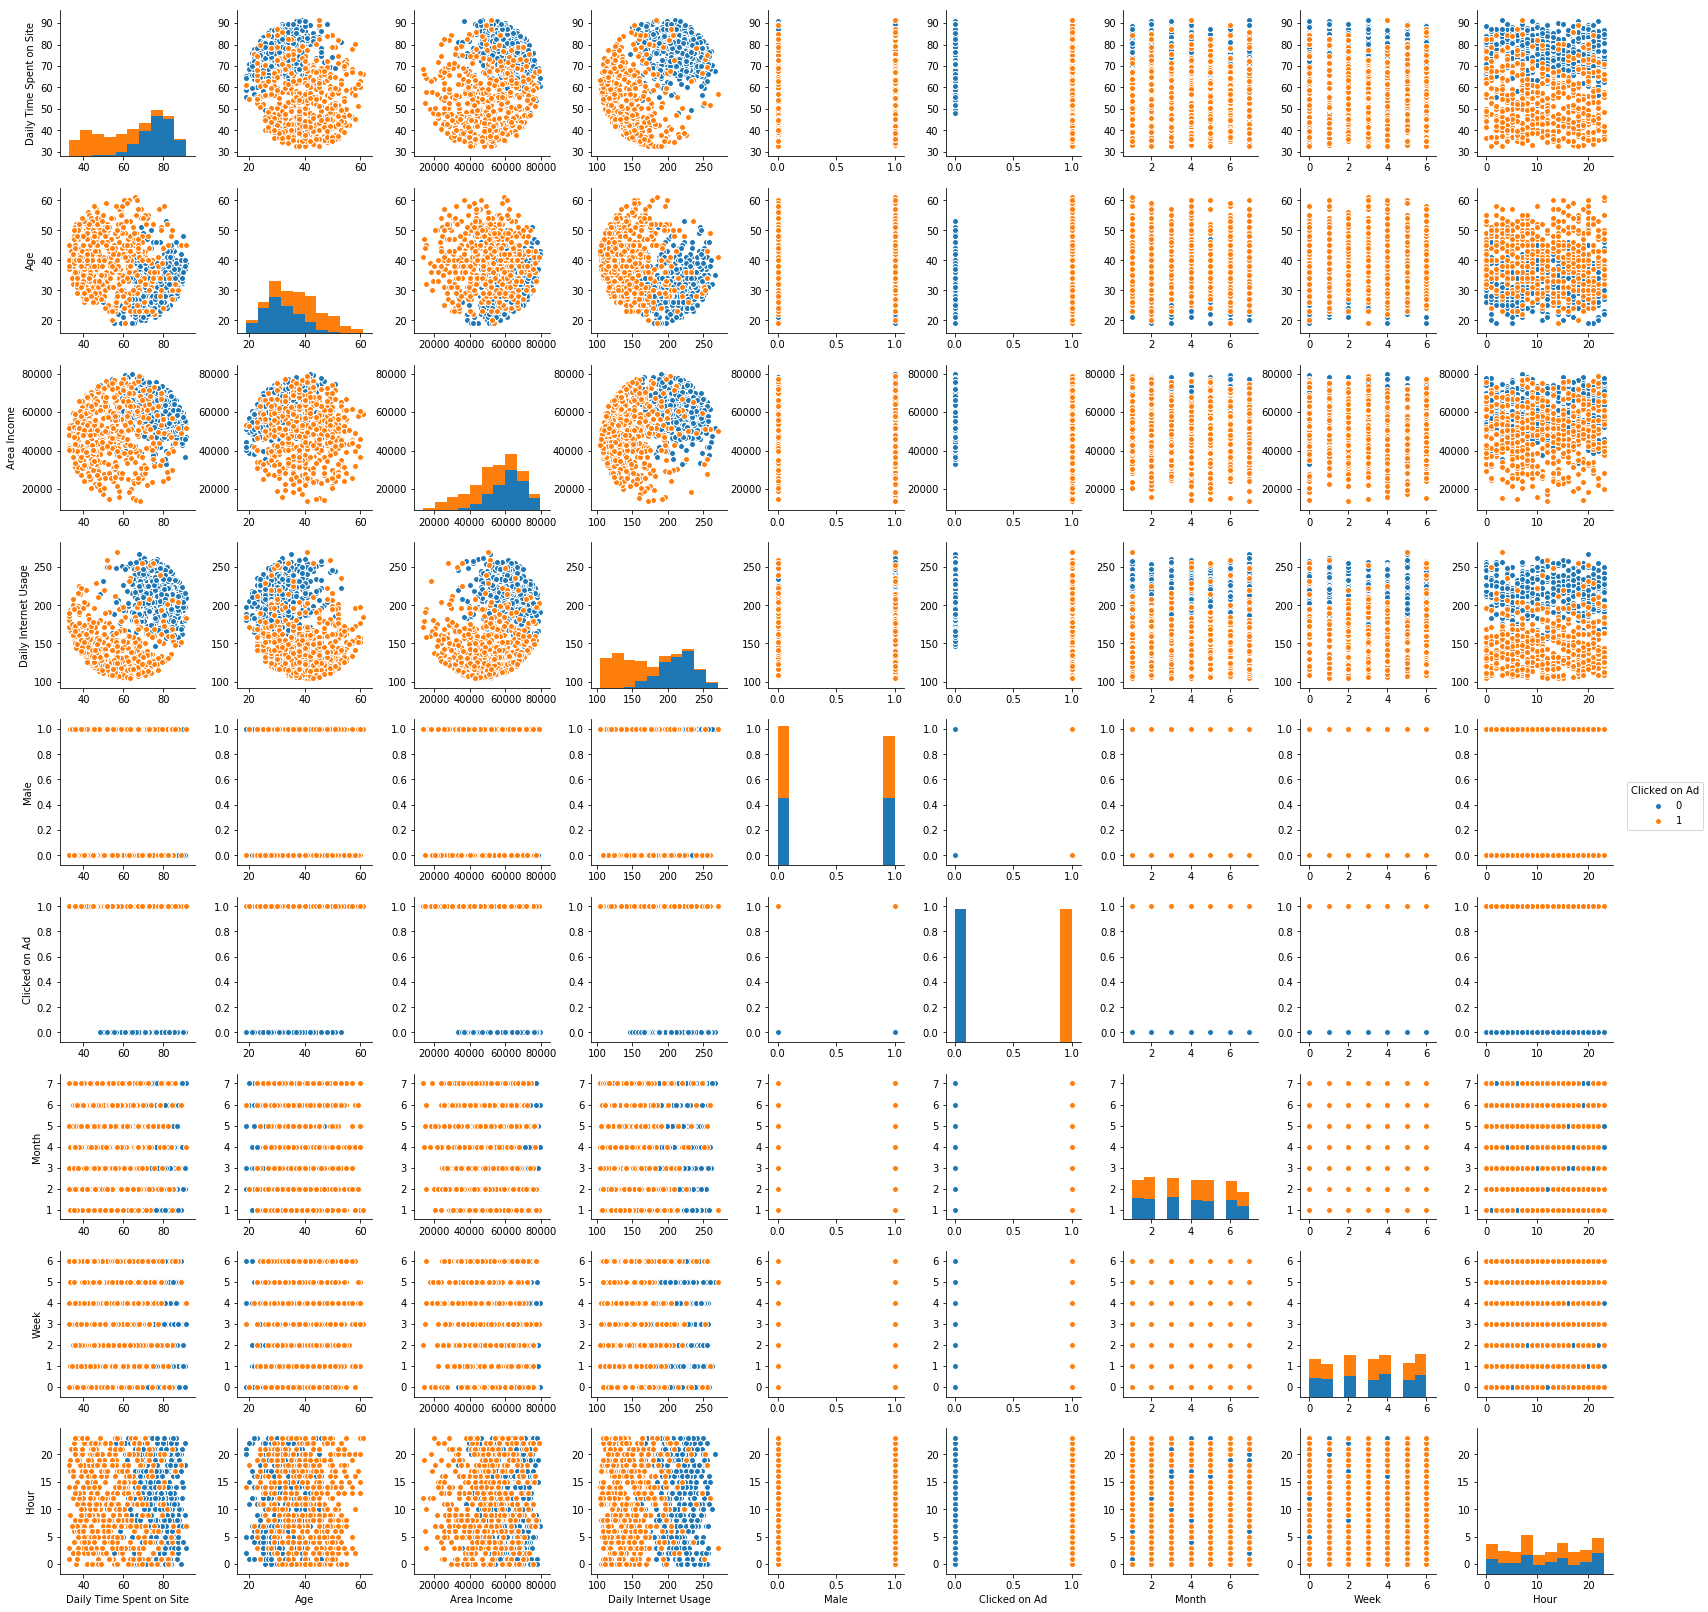

In [26]:
# 画出散布矩阵图来观察个特征变量的分布情况
sns.pairplot(df,hue='Clicked on Ad') 

### 1.1 分离标签删除无用特征

In [42]:
label = df['Clicked on Ad']

features = df.drop(['Ad Topic Line', 'Timestamp', 'Clicked on Ad'],axis=1)
features.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Month,Week,Hour
0,68.95,35,61833.9,256.09,Wrightburgh,0,Tunisia,3,6,0


### 1.2 对数字特征进行转换

使特征间的差距缩小，同时在应用监督式学习器时，能够平等地对待每个特征。

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)

numerical = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Month','Week','Hour']

features[numerical] = scaler.fit_transform(features[numerical])

display(features.head(n = 2))


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Month,Week,Hour
0,0.617882,0.380952,0.730472,0.916031,Wrightburgh,0,Tunisia,0.333333,1.0,0.000000
1,0.809621,0.285714,0.831375,0.538746,West Jodi,1,Nauru,0.500000,0.0,0.043478


### 1.3 把非数字特征转换成数字特征

通常，学习算法都预期输入是数字，这就需要转换非数字特征（称为分类变量）。一种转换分类变量的常见方式是独热编码方法。独热编码会为每个非数字特征的每个可能类别创建一个_“虚拟”_变量。

这里使用 pandas.get_dummies() 对数据进行独热编码。为每个非数字特征的每个可能类别创建一个虚拟变量。

In [44]:
features_final = pd.get_dummies(features)

### 1.4 把数据集拆分为训练集和测试集

In [45]:
# 随机打乱并拆分数据，20%为测试集

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    label,
                                                    test_size = 0.2,
                                                    random_state = 0)

### 2. 预测点击

#### 2.1 评估指标的选择
预测广告的点击量，通常可以帮助我们帮助我们了解广告更受哪类人群的喜欢，适合在哪个时间段投放等等。还可以帮助预测CTR，进而预测ROAS、ROI等。

首先准确率是评估模型效果的一个有效指标， 同时我们还可以通过 F-β 分数考虑精确率和召回率。广告投放目标不对，很可能造成资源浪费，而收效甚微，为了通过低成本获取高利润，在这里精确率似乎更重要一些。

精确率：TP/（TP+FP），真正例占所有预测为正例的比例。关注是否找得准。

F-β = (1+β2)⋅precision⋅recall  /  [ (β2⋅precision)+recall ]，β值越小越倾向于精确率， 因此取beta = 0.5。

#### 2.2 模型的选择

根据经验，选择SVM，LR，和DT进行初始模型尝试。

分别比较他们在不同数量的样本中时间消耗以及准确度和fbeta_score。

In [52]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end - start
    
    # 计算预测训练集前200个数据所花的时间
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:200])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
    
    # Compute accuracy on the first 300 training samples which is y_train[:200]
    results['acc_train'] = accuracy_score(y_train[:200], predictions_train)
    
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 200 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:200], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print('train time is: {}'.format(results['train_time']))
    print('predition time is: {}'.format(results['pred_time']))
    print('accuracy on training set is: {}'.format(results['acc_train']))
    print('accuracy on testing set is: {}'.format(results['acc_test']))
    print('fbeta score on training set is: {}'.format(results['f_train']))
    print('fbata score on testinig set is: {}'.format(results['f_test']))
    print('------------------------------------------------------')  

In [53]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier    

# nitialize the three models
clf_A = SVC(random_state=42)
clf_B = LogisticRegression(random_state=42)
clf_C = DecisionTreeClassifier(random_state=42)

# Calculate the number of samples for 50% and 100% of the training data
samples_100 = len(y_train)
samples_50 = int(samples_100 * 0.5)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_50, samples_100]):
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

/Users/jia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 400 samples.
train time is: 0.2330927848815918
predition time is: 0.21967601776123047
accuracy on training set is: 0.555
accuracy on testing set is: 0.54
fbeta score on training set is: 0.0
fbata score on testinig set is: 0.0
------------------------------------------------------
SVC trained on 800 samples.
train time is: 0.884105920791626
predition time is: 0.39893674850463867
accuracy on training set is: 0.445
accuracy on testing set is: 0.46
fbeta score on training set is: 0.500562429696288
fbata score on testinig set is: 0.515695067264574
------------------------------------------------------
LogisticRegression trained on 400 samples.
train time is: 0.010602951049804688
predition time is: 0.002855062484741211
accuracy on training set is: 0.99
accuracy on testing set is: 0.96
fbeta score on training set is: 0.9954233409610983
fbata score on testinig set is: 0.9747706422018347
------------------------------------------------------
LogisticRegression trained on 800 samp

通过比较三个模型的在不同样本数量下的训练、预测时间，精确度和fbeta分数。可知：
1. LogisticRegression所花费的训练时间和预测时间最少；

2. 支持向量机的精确度和fbeta分数都最低；在测试集上的精确度和fbeta分数是逻辑斯蒂回归最高；

3. 随着样本数的增加支持向量机和逻辑斯蒂回归的精确度和fbeta分数都在上升，但决策树的却在下降。

综合考虑，选择逻辑斯蒂回归作为最终预测模型。


#### 2. 模型构建及优化
使用网格搜索交叉验证，为模型挑选最优参数。

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)

parameters = { 'penalty':['l1','l2'],'C':[0.5,1,1.5]}

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions  = (clf.fit(X_train, y_train)).predict(X_test)

best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9600
F-score on testing data: 0.9748

Optimized Model
------
Final accuracy score on the testing data: 0.9700
Final F-score on the testing data: 0.9797


## 三. 总结及建议

1. 女性比男性更容易受广告内容吸引，因此广告投放目标人群可更倾向于女性
2. 35～45岁间的人群对广告的点击量最大，可考虑主要针对此人群进行投放
3. Turkey, Ethiopia, Australia是点击最多的三个国家
4. 平均收入更低的地区点击量比收入高的地区多
5. 上网时长越短的人更容易对广告进行点击
6. 二月份的点击量最高；星期六的点击量也最高
7. 相比性别和年龄，平均收入对点击量的影响最大
8. 可通过构建逻辑斯蒂回归来预测点击量，最终测试集的准确度可达到97%，F分析可达到97.97%

不足：

没有相关数据能对广告的CTR、ROI等多指标进行分析，更深层次了解广告实际效果。